Grafica PoS individual


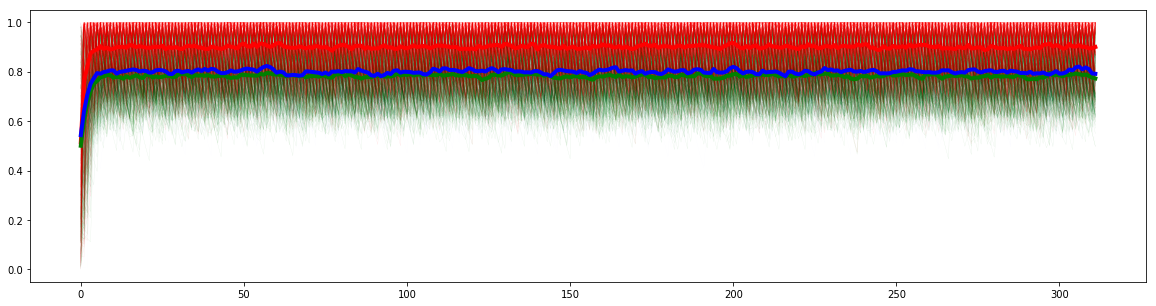

Grafica PoS media


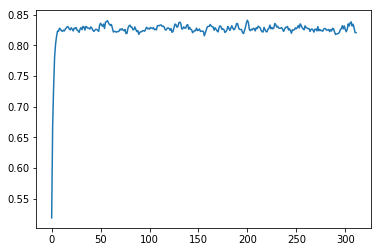

Grafica PoS media por grupos


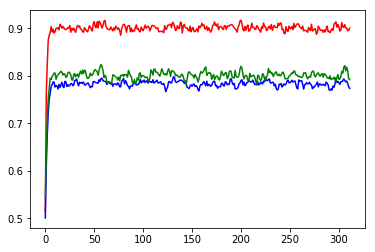

cantidad eventos criminales


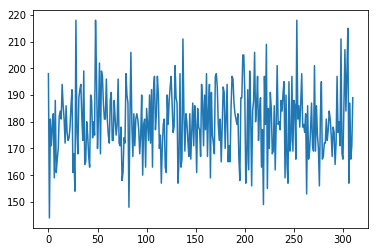

cantidad de victimas de al menos un crimen


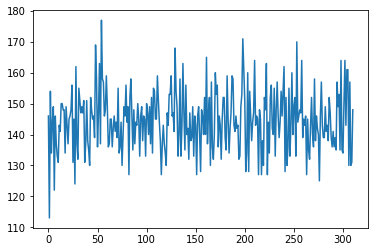

cantidad de pares de comunicacion


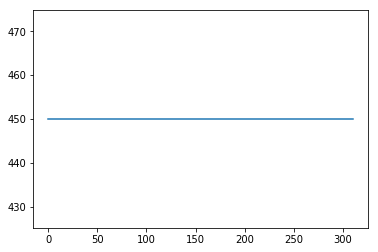

Porcentaje grupos con distinta media de crimen
[0.314 0.359 0.327]
Vector media de crimen por grupos
[0.05 0.   0.5 ]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
Homofilia
0.3333333333333333


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

n = 1000  # numero de personas
T = 312  # numero de periodos
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
g=np.zeros(n)#vector identificacion de grupo
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
m = 3  # cantidad de grupos con distinta tasa de crimen por periodo
q = np.array([0.314, 0.359, 0.327])  # porcentajes de los grupos en la poblacion total
lamda = np.array([0.05,0,0.5])  # tasas de crimen de los grupos
# lamda = np.random.rand(m)  # tasas de crimen de los grupos
# lamda[np.argmax(q)]=0 # para la mayor parte es el grupo inmune


#identificacion de cada sujeto con su respectiva media de crimen 
for i in range(int(n*q[0])):
    g[i]=lamda[0]
for i in range(int(n*q[0]),int(n*(q[0]+q[1]))):
    g[i]=lamda[1]
for i in range(int(n*(q[0]+q[1])),n):
    g[i]=lamda[2]

# calculo de la Pos en el intante t
# en t=0 es s
St[0] = s
robos=np.zeros(T)#cantidad de robos en cada periodo
numvictimas=np.zeros(T)# cantidad de victimas de al menos un crimen en cada periodo
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
homofilia=np.zeros(T)
commismogrupo=np.zeros(T)
for t in range(1,T):
    # Al inicio de cada periodo aplicamos la perdida de memoria
    s = psi * s
    
    for k in range(n):
        # numero de crimenes sufridos por la persona k 
        X = np.random.poisson(g[k])
        # posicion hubo crimen o no
        I = 0
        if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
            I = 1
            robos[t]=robos[t]+X
            numvictimas[t]=numvictimas[t]+1
        # efecto del crimen en la percepcion de k para el siguiente periodo
        s[k] = I + (1 - I) * s[k]
    
    victimas=[]#victimas de al menos 1 crimen
    
    #escogemos las parejas de comunicacion 
    paleatorio=np.random.permutation(np.arange(n))#personas grupo 1 en orden aleatorio
    persona1=paleatorio[:int(n*0.45)] #primer 10%
    persona2=paleatorio[-int(n*0.45):]#ultimo 10%

    for k in range(len(persona1)):
        #para grupo 1
        aux1=persona1[k]
        aux2=persona2[k]

        if s[aux1]<s[aux2]:
            s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
        else:
            s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
            s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])

        if g[aux1]==g[aux2]:
            commismogrupo[t]=commismogrupo[t]+1
        
    parescom[t]=len(persona1)
    homofilia[t]=commismogrupo[t]/parescom[t]
    

    
                                         
    St[t] = s
%matplotlib inline 
plt.figure(figsize=(20,5))
print("Grafica PoS individual")
plt.plot(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],'green',linewidth=0.3,alpha=0.1)
plt.plot(St[:,range(int(n*q[0]))],'blue',linewidth=0.3,alpha=0.01)
plt.plot(St[:,range(int(n*q[0]+n*q[1]),n)],'red',linewidth=0.3,alpha=0.1)
plt.plot(np.mean(St[:,range(int(n*q[0]+n*q[1]),n)],axis=1),'red',linewidth=4)
plt.plot(np.mean(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'green',linewidth=4)
plt.plot(np.mean(St[:,range(int(n*q[0]))],axis=1),'blue',linewidth=4)
plt.show()

print("Grafica PoS media")
plt.plot(np.mean(St,axis=1))
plt.show()
print("Grafica PoS media por grupos")
plt.plot(np.mean(St[:,range(int(n*q[0]+n*q[1]),n)],axis=1),'red')
plt.plot(np.mean(St[:,range(int(n*q[0]),int(n*q[0]+n*q[1]))],axis=1),'blue')
plt.plot(np.mean(St[:,range(int(n*q[0]))],axis=1),'green')
plt.show()


print("cantidad eventos criminales")
plt.plot(robos[1:])
plt.show()
print("cantidad de victimas de al menos un crimen")
plt.plot(numvictimas[1:])
plt.show()
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("Homofilia")
print(np.mean(homofilia))

Text(-25,0,'Secure')

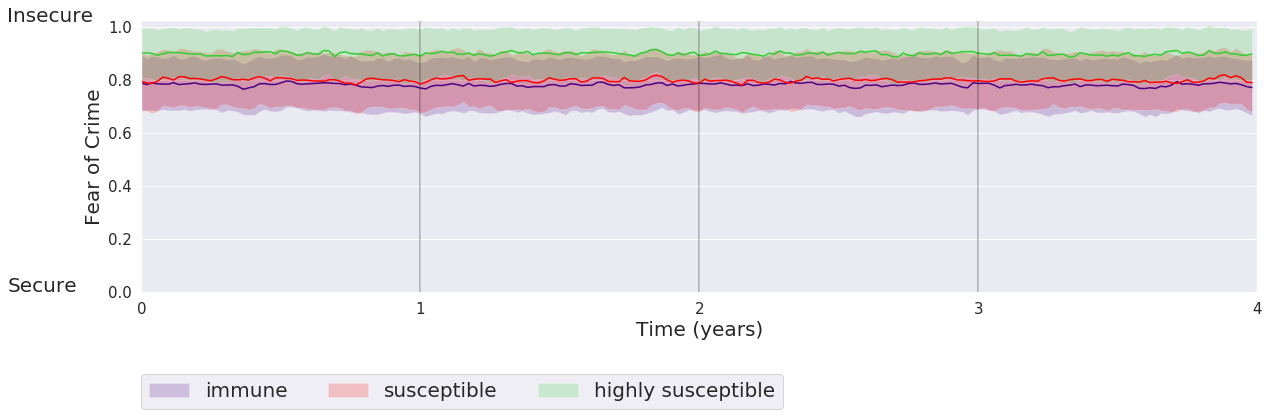

In [4]:
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
sns.tsplot(data=St[104:,range(int(n*q[0]),int(n*q[0]+n*q[1]))].T,ci='sd',color='indigo')
sns.tsplot(data=St[104:,range(int(n*q[0]))].T,ci='sd',color='red')
sns.tsplot(data=St[104:,range(int(n*q[0]+n*q[1]),n)].T,ci='sd',color='limegreen')
h = plt.gca().get_lines()
plt.legend(labels=["immune","susceptible","highly susceptible" ],ncol=3,fontsize=20,bbox_to_anchor=(0, -0.3), loc=2, borderaxespad=0)
plt.axvline(52, color = 'black',alpha=0.3)
plt.axvline(104, color = 'black',alpha=0.3)
plt.axvline(156, color = 'black',alpha=0.3)
plt.xlabel("Time (years)",fontsize=20)
plt.ylabel("Fear of Crime",fontsize=20)
plt.ylim(0,None)
ax = plt.axes()
ax.tick_params(labelsize=15)
ax.xaxis.set_ticks([0, 52, 104, 156, 208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])
plt.text(-25, 1.02,'Insecure', fontsize=20)
plt.text(-25, 0,'Secure', fontsize=20)
# plt.savefig('expgraph2.pdf',bbox_inches="tight")

0.4347453431730031
0.04492140469362312


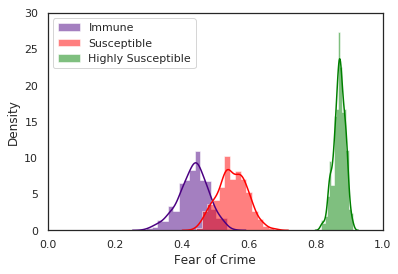

In [39]:
gi=St[104:,range(int(n*q[0]),int(n*q[0]+n*q[1]))].T
gs=St[104:,range(int(n*q[0]))].T
gh=St[104:,range(int(n*q[0]+n*q[1]),n)].T


gimean=np.zeros(gi.shape[0])
for i in range(gi.shape[0]):
    gimean[i]=np.mean(gi[i])
print(np.mean(gimean))
print(np.std(gimean))

gsmean=np.zeros(gs.shape[0])
for i in range(gs.shape[0]):
    gsmean[i]=np.mean(gs[i])


ghmean=np.zeros(gh.shape[0])
for i in range(gh.shape[0]):
    ghmean[i]=np.mean(gh[i])


# weights = np.ones_like(gimean)/float(len(gimean))
# sns.distplot(gimean,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False,color='indigo')
sns.distplot(gimean,hist_kws={'alpha':0.5,'histtype':'stepfilled'},color='indigo')

# weights = np.ones_like(gsmean)/float(len(gsmean))
# sns.distplot(gsmean,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False,color='red')
sns.distplot(gsmean,hist_kws={'alpha':0.5,'histtype':'stepfilled'},color='red')
    
# weights = np.ones_like(ghmean)/float(len(ghmean))
# sns.distplot(ghmean,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False,color='green')    
sns.distplot(ghmean,hist_kws={'alpha':0.5,'histtype':'stepfilled'},color='green')    
sns.set_style("white")
plt.grid(False)
plt.xlim(0,1)
plt.ylim(0,30)
plt.legend(["Immune","Susceptible","Highly Susceptible" ])
plt.xlabel('Fear of Crime')
plt.ylabel('Density')

# plt.annotate('0.18', xy=(0.5, 7), xytext=(0.46, 12),arrowprops=dict(facecolor='black', shrink=1.5,width=2,headwidth=10))

plt.savefig("dist_3g_nog.pdf")

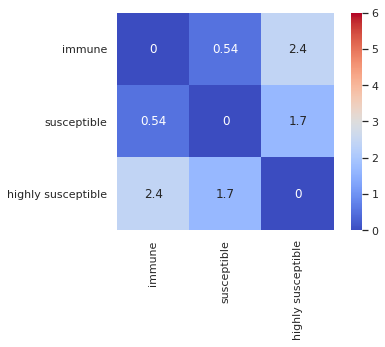

In [40]:
gi=St[104:,range(int(n*q[0]),int(n*q[0]+n*q[1]))].T
gs=St[104:,range(int(n*q[0]))].T
gh=St[104:,range(int(n*q[0]+n*q[1]),n)].T
tiempo=gi.shape[1]
gimean=np.zeros(tiempo)
gistd=np.zeros(tiempo)
gsmean=np.zeros(tiempo)
gsstd=np.zeros(tiempo)
ghmean=np.zeros(tiempo)
ghstd=np.zeros(tiempo)
for i in range(tiempo):
    gimean[i]=np.mean(gi[i][:])
    gsmean[i]=np.mean(gs[i][:])
    ghmean[i]=np.mean(gh[i][:])
    gistd[i]=np.std(gi[i][:])
    gsstd[i]=np.std(gs[i][:])
    ghstd[i]=np.std(gh[i][:])
g=[(gi,gimean,gistd),(gs,gsmean,gsstd),(gh,ghmean,ghstd)]
D=np.zeros((3,3))
for k in range(3):
    for n in range(3):
        d=np.zeros(tiempo)
        for i in range(tiempo):
            N1=g[k][0].shape[0]
            N2=g[n][0].shape[0]
            s2=((N1-1)*g[k][2][i]**2+(N2-1)*g[n][2][i]**2)/(N1+N2-2)
            d[i]=(g[k][1][i]-g[n][1][i])/np.sqrt(s2)
        D[k][n]=abs(np.mean(d))
                
D
ax = sns.heatmap(D,annot=True,cmap="coolwarm",square=True,
                 xticklabels=["immune","susceptible","highly susceptible"],
                 yticklabels=["immune","susceptible","highly susceptible"],
                vmin=0,vmax=6)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.savefig("matrix_nograph.svg")

In [41]:
for i in range(m):
    print(np.mean(g[i][1]))
    print(np.std(g[i][1]))
    print("-----------")

0.4333684555319113
0.04543290403460577
-----------
0.5516393135059243
0.045794174394744494
-----------
0.8715931295470322
0.017160891877927936
-----------


In [42]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import simps

def area(g1,g2):
    if sum(g1-g2) != 0:
        mu1, std = norm.fit(g1)
#         plt.hist(g1, bins=25, density=True, alpha=0.6)
        x = np.linspace(0,1,100)
        fitted_pdf1 = norm.pdf(x,loc =mu1,scale = std)

#         plt.plot(x,fitted_pdf1,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)

        mu2, std = norm.fit(g2)
#         plt.hist(g2, bins=25, density=True, alpha=0.6)
        fitted_pdf2 = norm.pdf(x,loc =mu2,scale = std)

#         plt.plot(x,fitted_pdf2,"orange",label="Fitted normal dist",linestyle="dashed", linewidth=2)

#         plt.show()
        idx = np.argwhere(np.diff(np.sign(fitted_pdf1 - fitted_pdf2))).flatten()

        if mu1 < mu2 :
            return round(simps(fitted_pdf2[:idx[0]],dx=0.01)+simps(fitted_pdf1[idx[0]:],dx=0.01),4)
        else:
            f1=fitted_pdf2
            f2=fitted_pdf1
            return round(simps(f2[:idx[0]],dx=0.01)+simps(f1[idx[0]:],dx=0.01),4)
    else:
        return 0

[Text(0,0.5,'0'), Text(0,1.5,'1'), Text(0,2.5,'2')]

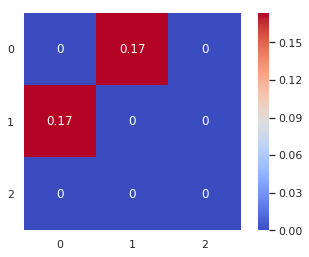

In [43]:
areas=np.zeros((3,3))
g=[gimean,gsmean,ghmean]
for i in range(len(g)):
    for j in range(len(g)):
        areas[i][j]=area(g[i],g[j])
ax = sns.heatmap(areas,annot=True,cmap="coolwarm",
                 square=True,
                 vmin=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

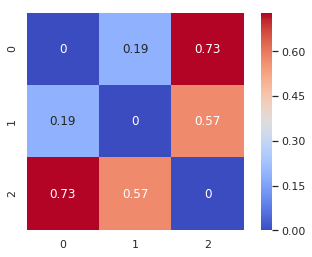

In [44]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import simps
import math

def hellinger(g1,g2):
    

    mu1, std1 = norm.fit(g1)
    mu2, std2 = norm.fit(g2)
    expo = -0.25*((mu1-mu2)**2/(std1**2+std2**2))
    H=1-math.sqrt((2*std1*std2)/(std1**2+std2**2))*math.exp(expo)
    
    return np.sqrt(H)

G=[gi,gs,gh]
H=np.zeros((m,m))
for i in range(m):
    for j in range(m):
        ht=np.zeros(tiempo)
        for t in range(tiempo):
            ht[t]=hellinger(G[i][:,t],G[j][:,t])
#         plt.plot(ht)
#         plt.show()
        H[i][j]=np.mean(ht)
sns.heatmap(H,annot=True,cmap="coolwarm",
                 square=True)